# Incremental Face Recognition System

## Labelled Faces in the Wild (LFW) Dataset

About Dataset
Context
Labeled Faces in the Wild (LFW) is a database of face photographs designed for studying the problem of unconstrained face recognition. This database was created and maintained by researchers at the University of Massachusetts, Amherst (specific references are in Acknowledgments section). 13,233 images of 5,749 people were detected and centered by the Viola Jones face detector and collected from the web. 1,680 of the people pictured have two or more distinct photos in the dataset. The original database contains four different sets of LFW images and also three different types of "aligned" images. According to the researchers, deep-funneled images produced superior results for most face verification algorithms compared to the other image types. Hence, the dataset uploaded here is the deep-funneled version.

Content
There are 11 files in this dataset. lfw-deepfunneled.zip is the file containing the images. All other 10 files are relevant metadata that may help you in forming your training and testing sets for your model. There are two sections below to help you navigate the files better. The first section provides information specifically pertaining to the images. The second section explains the content of each metadata file.

Image information:

Image file format: Each image is available as "lfw/name/name_xxxx.jpg" where "xxxx" is the image number padded to four characters with leading zeroes. For example, the 10th George_W_Bush image can be found as "lfw/George_W_Bush/George_W_Bush_0010.jpg"
Image dimensions: Each image is a 250x250 jpg, detected and centered using the openCV implementation of Viola-Jones face detector. The cropping region returned by the detector was then automatically enlarged by a factor of 2.2 in each dimension to capture more of the head and then scaled to a uniform size.

This all the step of the Project:
###  Step 1: Data Preprocessing & Augmentation
###  Step 2: Face Detection & Alignment (MTCNN/RetinaFace)
###  Step 3: Feature Extraction (FaceNet/ArcFace in PyTorch with CUDA support)
###  Step 4: Real-Time Face Recognition with Webcam (Authorized/Not Authorized Display)
###  Step 5: Incremental Learning for Adding New Students Dynamically
###  Step 6: Deploy the Incremental Learning System for Recognizing and Adding The autorised and not autorisedd Student  Adding New Students Dynamically by capturing an image and the name 



### The senario I am trying to do an incrimental face recognition system that detect the student autorised or no to enter the exam class room, and the incrimental learning work by adding new student by capturing picture and name, and after that the system start reconising them as autorised student

### This project developedd and created by ANASS NASSIRI 908475


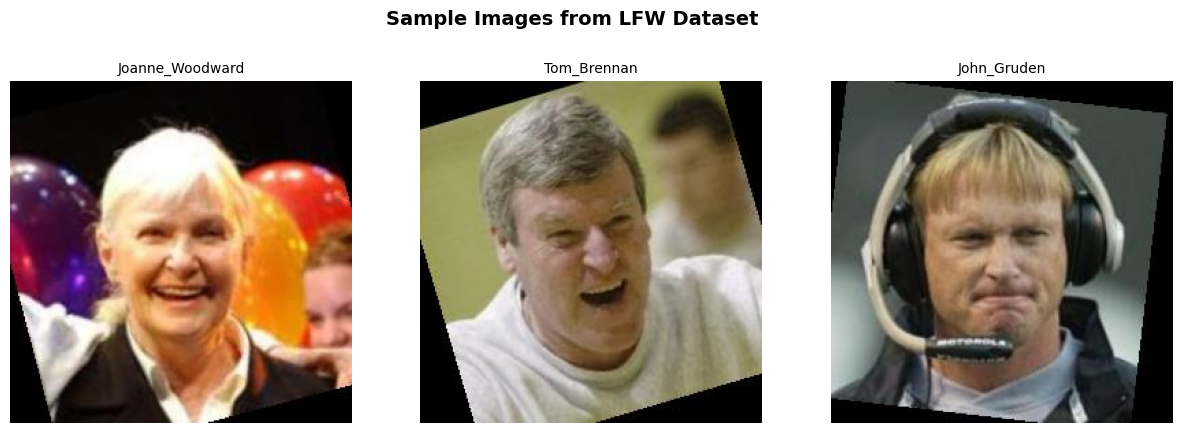

In [18]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

lfw_path = "lfw-deepfunneled/lfw-deepfunneled"  # Path ofLFW dataset

lfw_people = [person for person in os.listdir(lfw_path) if os.path.isdir(os.path.join(lfw_path, person))]

random_people = random.sample(lfw_people, 3)

lfw_images = []
for person in random_people:
    person_path = os.path.join(lfw_path, person)
    images = [img for img in os.listdir(person_path) if img.endswith((".jpg", ".jpeg", ".png"))]
    
    if images:
        image_path = os.path.join(person_path, random.choice(images))
        lfw_images.append((person, image_path))

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (person, img_path) in zip(axes, lfw_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(person, fontsize=10)
    ax.axis("off")

plt.suptitle("Sample Images from LFW Dataset", fontsize=14, fontweight="bold")
plt.show()


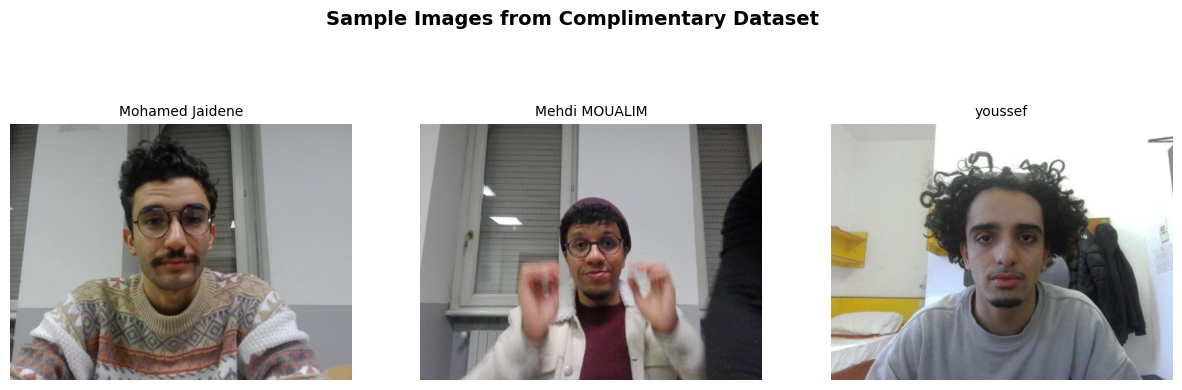

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

lfw_path = "student_images"  # Path of complimentaray (acquaintances) dataset

lfw_people = [person for person in os.listdir(lfw_path) if os.path.isdir(os.path.join(lfw_path, person))]

random_people = random.sample(lfw_people, 3)

lfw_images = []
for person in random_people:
    person_path = os.path.join(lfw_path, person)
    images = [img for img in os.listdir(person_path) if img.endswith((".jpg", ".jpeg", ".png"))]
    
    if images:
        image_path = os.path.join(person_path, random.choice(images))
        lfw_images.append((person, image_path))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (person, img_path) in zip(axes, lfw_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(person, fontsize=10)
    ax.axis("off")

plt.suptitle("Sample Images from Complimentary Dataset", fontsize=14, fontweight="bold")
plt.show()


### This code i used the capture second dataset of my friends to use them for complementing by a set of images that include myself and some of my acquaintances.(my friends)

In [ ]:
import cv2
import os
from facenet_pytorch import MTCNN
from PIL import Image

# Initializing MTCNN for Face Detection
mtcnn = MTCNN(image_size=160, margin=20)  # Ensure images are cropped & aligned properly

#  Image Storage Path
IMAGE_STORAGE_DIR = "student_images"  # Folder where all student images will be stored
if not os.path.exists(IMAGE_STORAGE_DIR):
    os.makedirs(IMAGE_STORAGE_DIR)

# Capture and Save Images for a New Student
def capture_student_images(student_name, num_images=10):  # how many images to save
    student_folder = os.path.join(IMAGE_STORAGE_DIR, student_name)
    
    if not os.path.exists(student_folder):
        os.makedirs(student_folder)

    cap = cv2.VideoCapture(0)
    captured_images = 0  

    print(f"📸 Capturing {num_images} images for {student_name}. Press 'q' to stop early.")

    while captured_images < num_images:
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to capture frame.")
            break
        
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert to PIL format
        face = mtcnn(img)  # Detect & crop face
        
        if face is not None:
            # Save the image in the student's folder
            img_path = os.path.join(student_folder, f"{captured_images+1}.jpg")
            img.save(img_path)  
            captured_images += 1
            print(f"✅ Saved image {captured_images}/{num_images}")

        # Showing webcam feed with student name
        cv2.putText(frame, f"Capturing {captured_images}/{num_images}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Student Image Capture", frame)

        # pressing  'q' to stop early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    print(f"✅ Completed capturing {captured_images} images for {student_name}.")

student_name = input("Enter student's name: ")
num_images = int(input("How many images to capture? "))
capture_student_images(student_name, num_images)


📸 Capturing 10 images for testing. Press 'q' to stop early.
✅ Saved image 1/10
✅ Saved image 2/10
✅ Saved image 3/10
✅ Saved image 4/10
✅ Saved image 5/10
✅ Saved image 6/10
✅ Saved image 7/10
✅ Saved image 8/10
✅ Saved image 9/10
✅ Saved image 10/10
✅ Completed capturing 10 images for testing.


In [ ]:
import os
import cv2
import numpy as np
import torch
from mtcnn import MTCNN
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm  # Progress bar

# Initializing The  MTCNN for face detection
detector = MTCNN()

# This the Dataset paths
LFW_PATH = "lfw-deepfunneled/lfw-deepfunneled"  # Path to LFW dataset
STUDENT_PATH = "student_images"  # Path to Student dataset
PROCESSED_PATH = "processed_faces"  # Directory to save processed images

# Ensure processed directory exists
os.makedirs(PROCESSED_PATH, exist_ok=True)

#Data Augmentation Transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=10),  # Random Rotation
    transforms.RandomHorizontalFlip(),  # Horizontal Flip
    transforms.ColorJitter(brightness=0.2),  # Brightness Adjustment
    transforms.GaussianBlur(kernel_size=(5, 5)),  # Gaussian Noise
    transforms.ToTensor()
])
def detect_and_align_face(img_path):
    """Detecting and extracting a face from an image using MTCNN."""
    if not os.path.exists(img_path):  # Check if file exists
        print(f"Error: File {img_path} not found.")
        return None
    
    img = cv2.imread(img_path)
    if img is None:  
        print(f"Error: Unable to read image {img_path}")
        return None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    faces = detector.detect_faces(img_rgb)

    if len(faces) > 0:
        x, y, w, h = faces[0]['box']
        face = img_rgb[y:y+h, x:x+w]  # Croping the  detected face
        face_resized = cv2.resize(face, (160, 160))  # Resizing for FaceNet
        return face_resized
    return None

# In this I Process both LFW & Student datasets
for dataset_path in [LFW_PATH, STUDENT_PATH]:
    print(f"\nProcessing dataset: {dataset_path}...")
    
    for person in tqdm(os.listdir(dataset_path)):  # Show progress bar
        person_path = os.path.join(dataset_path, person)
        
        if not os.path.isdir(person_path):  # Ensure it's a directory
            continue

        # Creating a directory for processed faces
        processed_person_path = os.path.join(PROCESSED_PATH, person)
        os.makedirs(processed_person_path, exist_ok=True)

        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)

            # Ensuring only valid image files are processed , just to handle errors
            valid_extensions = (".jpg", ".jpeg", ".png")
            if not img_name.lower().endswith(valid_extensions):
                continue

            processed_img = detect_and_align_face(img_path)

            if processed_img is not None:
                # HERE IS FOR ConvertING to PIL image for augmentation
                img_pil = Image.fromarray(processed_img)

                # SavING original image
                img_pil.save(os.path.join(processed_person_path, img_name))

                # ApplyING augmentation and save augmented image
                augmented_img = augmentation_transforms(img_pil)
                augmented_img = transforms.ToPILImage()(augmented_img)
                augmented_img.save(os.path.join(processed_person_path, f"aug_{img_name}"))


print("\n✅ Preprocessing & Data Augmentation Completed Successfully!")

# it take alot of time so i do it only want time and i save them


Processing dataset: lfw-deepfunneled/lfw-deepfunneled...


  2%|▏         | 120/5749 [00:18<12:07,  7.74it/s]

### This code just the display some of images before and afeter data preprocesing


Showing preprocessing steps for Student dataset samples:


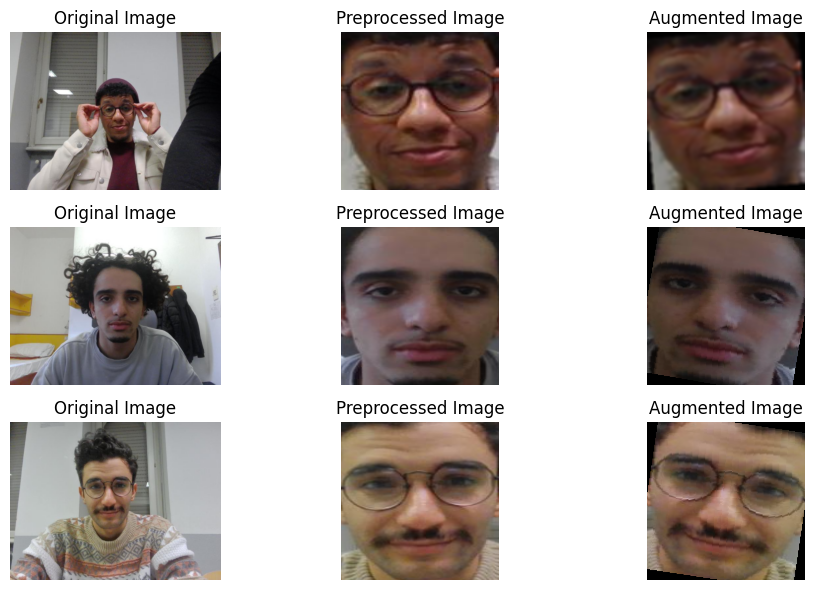

In [ ]:
import os
import cv2
import numpy as np
import torch
from mtcnn import MTCNN
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import random

# Initialize MTCNN for face detection
detector = MTCNN()

# Define dataset paths
dataset_PATH = "student_images"  # Ensure this path is correct
PROCESSED_PATH = "processed_faces"

# Define Data Augmentation Transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2),
    transforms.GaussianBlur(kernel_size=(5, 5)),
    transforms.ToTensor()
])

# Function to detect and align face
def detect_and_align_face(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img_rgb)

    if len(faces) > 0:
        x, y, w, h = faces[0]['box']
        face = img_rgb[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (160, 160))
        return face_resized
    return None

# Select random images from the student dataset
def select_random_student_images(student_path, num_samples=3):
    selected_images = []
    student_dirs = [d for d in os.listdir(student_path) if os.path.isdir(os.path.join(student_path, d))]

    for _ in range(num_samples):
        person = random.choice(student_dirs)
        person_path = os.path.join(student_path, person)
        img_name = random.choice(os.listdir(person_path))
        img_path = os.path.join(person_path, img_name)
        selected_images.append(img_path)

    return selected_images

#  displaying original, preprocessed, and augmented images
def show_dataset_images_preprocessing_steps(student_path, num_samples=3):
    selected_images = select_random_student_images(student_path, num_samples)

    fig, axes = plt.subplots(len(selected_images), 3, figsize=(10, 6))

    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        preprocessed_img = detect_and_align_face(img_path)

        if preprocessed_img is not None:
            preprocessed_pil = Image.fromarray(preprocessed_img)
            augmented_img = augmentation_transforms(preprocessed_pil)
            augmented_img = transforms.ToPILImage()(augmented_img)

            axes[i, 0].imshow(img)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")

            axes[i, 1].imshow(preprocessed_pil)
            axes[i, 1].set_title("Preprocessed Image")
            axes[i, 1].axis("off")

            axes[i, 2].imshow(augmented_img)
            axes[i, 2].set_title("Augmented Image")
            axes[i, 2].axis("off")

    plt.tight_layout()
    plt.show()

print("\nShowing preprocessing steps for Student dataset samples:")
show_dataset_images_preprocessing_steps(dataset_PATH)




Showing preprocessing steps for LFW dataset samples:


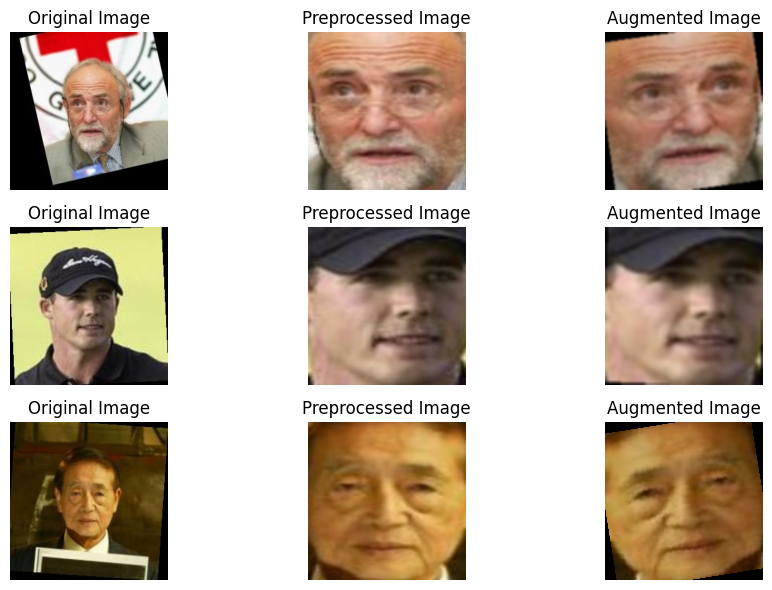

In [ ]:
Data_PATH="lfw-deepfunneled/lfw-deepfunneled"
print("\nShowing preprocessing steps for LFW dataset samples:")
show_dataset_images_preprocessing_steps(Data_PATH)

In [1]:
import os
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from facenet_pytorch import InceptionResnetV1  # Pretrained FaceNet model

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the pretrained FaceNet model
facenet_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Define the preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Ensure image is 160x160
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to range [-1, 1]
])

# Paths
PROCESSED_PATH = "processed_faces"  # Directory with preprocessed images
EMBEDDINGS_PATH = "face_embeddings.npz"  # File to save embeddings

# Dictionary to store embeddings and labels
embeddings = []
labels = []

# Extract embeddings for all images
print("\nExtracting face embeddings...")
for person in tqdm(os.listdir(PROCESSED_PATH)):  # Iterate over each person
    person_path = os.path.join(PROCESSED_PATH, person)
    
    if not os.path.isdir(person_path):
        continue  # Skip non-directory files

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)

        # Open image and apply transformations
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

        # Extract 512-d embedding
        with torch.no_grad():
            embedding = facenet_model(img_tensor).cpu().numpy().flatten()
        
        embeddings.append(embedding)
        labels.append(person)

# Convert lists to NumPy arrays
embeddings = np.array(embeddings)
labels = np.array(labels)

# Save embeddings for future use
np.savez_compressed(EMBEDDINGS_PATH, embeddings=embeddings, labels=labels)
print(f"\n✅ Face embeddings extracted and saved to {EMBEDDINGS_PATH}!")

# Display an example embedding
print(f"\nExample Embedding (First Image):\n{embeddings[0]}")
print(f"Associated Label: {labels[0]}")


Using device: cuda

Extracting face embeddings...


100%|██████████| 5755/5755 [05:32<00:00, 17.32it/s]  



✅ Face embeddings extracted and saved to face_embeddings.npz!

Example Embedding (First Image):
[-0.01341883 -0.08670852 -0.05174877  0.01656888  0.01389744 -0.0454387
 -0.01195512 -0.03502641  0.00423315  0.00520281  0.00764716  0.06291418
  0.01870861 -0.02379206 -0.01237745  0.13394317 -0.03827729 -0.06521268
  0.07242876 -0.01128361  0.05079532 -0.0308378  -0.00212347  0.06160292
  0.0223365  -0.10094447  0.01147893 -0.00757547 -0.09908097  0.02330132
  0.01180472 -0.09720135 -0.04556138  0.01323234 -0.05350938  0.01232778
  0.03452069  0.06162421 -0.05300042 -0.03990328 -0.02033284  0.054569
  0.0317312   0.01729401 -0.00304814  0.10589206  0.04204415 -0.04708214
  0.01964215  0.08608436  0.05060911  0.01230394 -0.00818227 -0.08886955
 -0.03670169 -0.01156924  0.09645295 -0.07334445 -0.01082147  0.06220363
 -0.06005142 -0.01262189  0.06222181  0.05376087  0.0378342   0.02906589
 -0.01845215 -0.02433047 -0.00648773 -0.02857388 -0.03658271 -0.01315422
  0.10583308  0.01755935 -0.00

Using device: cuda

🔹 Training the Classifier...
Epoch [1/20] - Loss: 7.3342, Test Accuracy: 0.1674
Epoch [2/20] - Loss: 5.0972, Test Accuracy: 0.3807
Epoch [3/20] - Loss: 2.5384, Test Accuracy: 0.5405
Epoch [4/20] - Loss: 0.9659, Test Accuracy: 0.6357
Epoch [5/20] - Loss: 0.4471, Test Accuracy: 0.7420
Epoch [6/20] - Loss: 0.2417, Test Accuracy: 0.7920
Epoch [7/20] - Loss: 0.1473, Test Accuracy: 0.8084
Epoch [8/20] - Loss: 0.0933, Test Accuracy: 0.8241
Epoch [9/20] - Loss: 0.0612, Test Accuracy: 0.8279
Epoch [10/20] - Loss: 0.0384, Test Accuracy: 0.8347
Epoch [11/20] - Loss: 0.0293, Test Accuracy: 0.8433
Epoch [12/20] - Loss: 0.0217, Test Accuracy: 0.8495
Epoch [13/20] - Loss: 0.0211, Test Accuracy: 0.8471
Epoch [14/20] - Loss: 0.0220, Test Accuracy: 0.8486
Epoch [15/20] - Loss: 0.0157, Test Accuracy: 0.8591
Epoch [16/20] - Loss: 0.0126, Test Accuracy: 0.8458
Epoch [17/20] - Loss: 0.0170, Test Accuracy: 0.8510
Epoch [18/20] - Loss: 0.0180, Test Accuracy: 0.8531
Epoch [19/20] - Loss: 0.

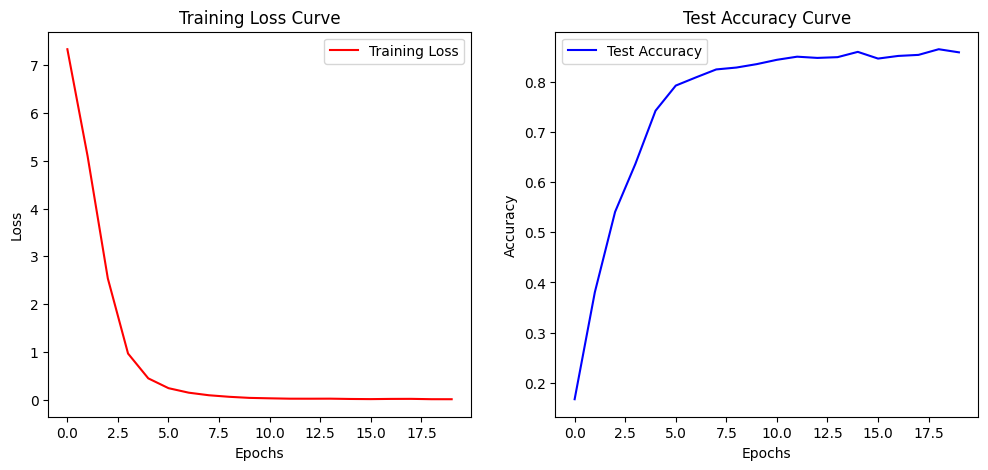


✅ Model saved as 'face_classifier.pth'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader

# Checking for GPU availability
# In this project I used my Laptop GPU nvidia rtx 4070
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load face embeddings and labels
data = np.load("face_embeddings.npz")
embeddings = data["embeddings"]
labels = data["labels"]

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_encoded, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Classifier Model
class FaceClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FaceClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initializing the  Model
num_classes = len(np.unique(labels_encoded))
model = FaceClassifier(input_size=512, num_classes=num_classes).to(device)

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Parameters
num_epochs = 20
train_losses = []
test_accuracies = []

# Training Loop
print("\n🔹 Training the Classifier...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Storing the  training loss
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluating the Model on Test Data
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

print("\n✅ Training Completed!")

# Here I Plot the  Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label="Training Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), test_accuracies, label="Test Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Curve")
plt.legend()

plt.show()

# Save Model
torch.save(model.state_dict(), "face_classifier.pth")
print("\n✅ Model saved as 'face_classifier.pth'")


In [1]:
import cv2
import torch
import numpy as np
import threading
import time
from facenet_pytorch import InceptionResnetV1, MTCNN
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
import imutils
import keyboard  # To detect keypresses without blocking

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Loading Pretrained FaceNet Model
facenet_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loading the  Face Detector (MTCNN)
mtcnn = MTCNN(keep_all=True, device="cpu")  # Keep on CPU for stability

# Loading Stored Embeddings and Labels
data = np.load("face_embeddings.npz")
embeddings = list(data["embeddings"])  
labels = list(data["labels"])

# Encoding the  Labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Define Classifier Model
class FaceClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FaceClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Loading the  Classifier and Fix Size Mismatch
def load_classifier():
    global classifier

    saved_state_dict = torch.load("face_classifier.pth")

    old_num_classes = saved_state_dict["fc3.weight"].shape[0]
    num_classes = len(np.unique(labels))

    if num_classes != old_num_classes:
        print(f"🔹 Updating classifier: {old_num_classes} → {num_classes} classes")
        updated_classifier = FaceClassifier(input_size=512, num_classes=num_classes).to(device)

        new_state_dict = updated_classifier.state_dict()
        for key in saved_state_dict.keys():
            if "fc3" not in key:
                new_state_dict[key] = saved_state_dict[key]

        new_state_dict["fc3.weight"][:old_num_classes] = saved_state_dict["fc3.weight"]
        new_state_dict["fc3.bias"][:old_num_classes] = saved_state_dict["fc3.bias"]

        updated_classifier.load_state_dict(new_state_dict)
        classifier = updated_classifier
    else:
        classifier = FaceClassifier(input_size=512, num_classes=num_classes).to(device)
        classifier.load_state_dict(saved_state_dict)

    classifier.eval()

load_classifier()

# Preprocessing Function
def preprocess_face(img):
    transform = transforms.Compose([
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    img = Image.fromarray(img).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img_tensor

# Extracting Face Embedding
def extract_embedding(face_img):
    img_tensor = preprocess_face(face_img)
    with torch.no_grad():
        embedding = facenet_model(img_tensor).cpu().numpy().flatten()
    return embedding

#  Recognizing a Face
def recognize_face(frame):
    boxes, _ = mtcnn.detect(frame)

    if boxes is not None:
        for box in boxes:
            x, y, w, h = map(int, box)
            face = frame[y:h, x:w]  # Crop face

            new_embedding = extract_embedding(face)
            similarities = [np.linalg.norm(new_embedding - emb) for emb in embeddings]
            min_distance = min(similarities)
            min_index = similarities.index(min_distance)
            threshold = 0.8

            if min_distance < threshold:
                recognized_person = labels[min_index]
                return recognized_person
    return "Unknown"

# Updating Classifier After New Enrollment, adding new student
def update_classifier():
    global classifier

    num_classes = len(np.unique(labels))
    updated_classifier = FaceClassifier(input_size=512, num_classes=num_classes).to(device)

    new_state_dict = updated_classifier.state_dict()
    old_state_dict = classifier.state_dict()

    for key in old_state_dict.keys():
        if "fc3" not in key:
            new_state_dict[key] = old_state_dict[key]

    new_state_dict["fc3.weight"][:old_state_dict["fc3.weight"].shape[0]] = old_state_dict["fc3.weight"]
    new_state_dict["fc3.bias"][:old_state_dict["fc3.bias"].shape[0]] = old_state_dict["fc3.bias"]

    updated_classifier.load_state_dict(new_state_dict)
    classifier = updated_classifier

    torch.save(classifier.state_dict(), "face_classifier.pth")
    print(f"✅ Classifier updated to {num_classes} classes!")

#  Enrolling  a New Student(acquaintances)
def enroll_new_student(name, frame):
    global embeddings, labels, label_encoder

    boxes, _ = mtcnn.detect(frame)

    if boxes is not None:
        for box in boxes:
            x, y, w, h = map(int, box)
            face = frame[y:h, x:w]
            new_embedding = extract_embedding(face)

            embeddings.append(new_embedding)
            labels.append(name)
            label_encoder.fit(labels)

            np.savez_compressed("face_embeddings.npz", embeddings=np.array(embeddings), labels=np.array(labels))
            print(f"✅ New student '{name}' enrolled successfully!")

            update_classifier()

# Multi-Threaded Video Processing, this the only way because of the keyboard librarythat blocks the main thread
class VideoStreamThread:
    def __init__(self):
        self.cap = cv2.VideoCapture(0)
        self.running = True
        self.thread = threading.Thread(target=self.update, args=())
        self.thread.daemon = True
        self.thread.start()

    def update(self):
        while self.running:
            ret, frame = self.cap.read()
            if not ret:
                continue

            frame = imutils.resize(frame, width=640)
            predicted_name = recognize_face(frame)

            if predicted_name and predicted_name != "Unknown":
                text = f"Access Granted: {predicted_name}"
                color = (0, 255, 0)
            else:
                text = "Access Denied"
                color = (255, 0, 0)

            cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.imshow("Real-Time Face Recognition", frame)

            if keyboard.is_pressed("n"):
                name = input("Enter new student's name: ")
                enroll_new_student(name, frame)

            if keyboard.is_pressed("q"):
                print("\n🔹 Exiting Real-Time Face Recognition...")
                self.running = False
                break

            cv2.waitKey(1)

    def stop(self):
        self.running = False
        self.cap.release()
        cv2.destroyAllWindows()

# Starting the Face Recognition System
if __name__ == "__main__":
    video_stream = VideoStreamThread()
    
    while video_stream.running:
        time.sleep(1)

    video_stream.stop()




Using device: cuda

🔹 Exiting Real-Time Face Recognition...
